![](../Assets/itd.png)
<div style= "Text-align: center">
    
# Analisis de Datos 
## Contador SQLite de Internet
### José Gabriel Rodriguez Rivas    
### Angel Omar Ceniceros Berumen
    
    

</div>

### Paso 1 Conectarse a la Base de Datos

In [1]:
# Code Cell 5
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline


In [2]:
conn = sqlite3.connect('./Data/InternetSpeed.db')

In [3]:
# Code Cell 6
# what is the name of the database you want to connect to?
# conn = sqlite3.connect(??)

cur = conn.cursor()

In [4]:
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY DateTime LIMIT 10'
cur.execute(query)

In [5]:
# Code Cell 8
for row in cur:
    print (row)


('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [6]:
# Code Cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print (row)

('2016-11-25 03:30:00.000000',)
('2016-11-30 22:00:00.000000',)
('2016-12-03 03:30:00.000000',)
('2016-12-06 01:00:00.000000',)
('2016-11-27 12:30:00.000000',)
('2016-12-01 23:30:00.000000',)
('2016-11-23 16:00:00.000000',)
('2016-12-13 06:00:00.000000',)
('2016-11-26 06:30:00.000000',)
('2016-12-08 18:00:00.000000',)


#### Paso 2: Nombres de las 900 columnas

In [7]:
# Code Cell 10
# we need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(query)

In [8]:
# Code Cell 11
#visualizing the first 10 rows of the field description
#Como el resultado de cur.execute retorna 900 columnas o datos
#Limitamos la descripcion a solo 10 datos
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [32]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]

In [31]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
columns = [c.replace('_u', '') for c in columns]

    
# this operation is to remove duplicates
columns = list(set(columns))

In [11]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E07000097',
 'E07000140',
 'E07000146',
 'E06000008',
 'E07000028',
 'E07000173',
 'E07000212',
 'E07000131',
 'E07000224',
 'E08000019']

In [12]:
# Code Cell 15
area = columns[0]
print (area)

E07000097


In [13]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys())

# we have the complete names as the values of the dictionary
print (suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


Text(0.5, 1.0, 'E07000097')

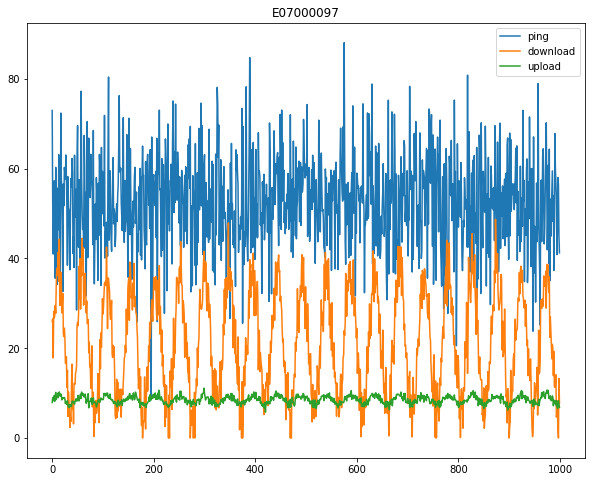

In [14]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query = 'SELECT {}{} FROM LA_wifi_speed_UK'.format(area,s)
    
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s])
plt.legend()
plt.title(area)

### Parte 2 : Manipular los datos con pandas

In [15]:
# Code Cell 18
new_columns = ['Area','Ping_promedio','Descarga_promedio','Subida_promedio']
#df = pd.DataFrame(columns = ?)

df = pd.DataFrame(columns = new_columns)
df

,Area,Ping_promedio,Descarga_promedio,Subida_promedio


In [16]:
# Code Cell 19
# this will take a while...
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_uk'.format(columns[i],s)
        
        cur.execute(query)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here

df.head()

,Area,Ping_promedio,Descarga_promedio,Subida_promedio
0,E07000097,52.566643,21.337226,8.495186
1,E07000140,51.647585,20.921209,8.349087
2,E07000146,52.580343,21.491920,8.535480
3,E06000008,52.433086,21.556528,8.568044
4,E07000028,52.276472,20.987441,8.375227


In [17]:
len(df)

326

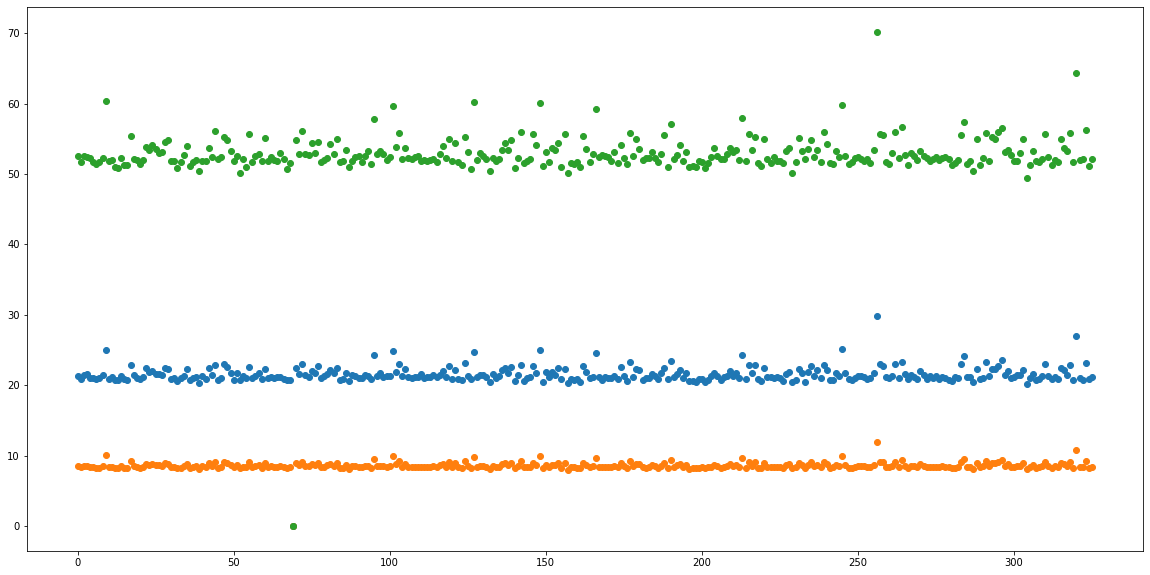

In [18]:
# Code Cell 20
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Descarga_promedio','Subida_promedio','Ping_promedio']], 'o')

In [21]:
# Code Cell 21
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
df.to_sql('velocidad_promedio',conn)

In [23]:
# Code Cell 22
# just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM velocidad_promedio'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E07000097', 52.56664278942319, 21.33722634718567, 8.4951857043562)
(1, 'E07000140', 51.64758453078289, 20.921209178435927, 8.349087127348026)


### Parte 3 Una las tablas con pandas

In [24]:
query = 'SELECT * FROM LA_population LIMIT 10'
cur.execute(query)

for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [28]:
# Code Cell 27
query = 'SELECT * FROM velocidad_promedio JOIN LA_population ON LA_population."LA_code"=velocidad_promedio.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    
    k+=1

(0, 'E07000097', 52.56664278942319, 21.33722634718567, 8.4951857043562, 'East Hertfordshire', 'E07000097', 137687)
(1, 'E07000140', 51.64758453078289, 20.921209178435927, 8.349087127348026, 'South Holland', 'E07000140', 88270)
(2, 'E07000146', 52.58034326046796, 21.491920052702298, 8.535479909251405, "King's Lynn and West Norfolk", 'E07000146', 147451)
(3, 'E06000008', 52.43308578557024, 21.556528215124327, 8.568043522748646, 'Blackburn with Darwen', 'E06000008', 147489)
(4, 'E07000028', 52.27647171098131, 20.98744092285397, 8.375227420926299, 'Carlisle', 'E07000028', 107524)
(5, 'E07000173', 51.776644192240006, 21.08961095204236, 8.443024729688117, 'Gedling', 'E07000173', 113543)
(6, 'E07000212', 51.389706926993824, 20.828279590307808, 8.302109505797402, 'Runnymede', 'E07000212', 80510)
(7, 'E07000131', 51.74362664094853, 21.045306762518386, 8.310117462372588, 'Harborough', 'E07000131', 85382)
(8, 'E07000224', 52.3354735193758, 21.44085961883801, 8.58293988911429, 'Arun', 'E07000224',